In [ ]:
# for the CNN
import numpy as np
import keras
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
import seaborn

In [ ]:
def create_model(regularizer, initializer, activation='relu',optimizer='adam'):
# create model
    model = Sequential()
    model.add(Conv1D(filters = 5, kernel_size = 11,
                 kernel_regularizer = regularizer,
                 kernel_initializer = initializer,
                 activation = activation,
                 input_shape = input_shape
                ))
    model.add(AveragePooling1D(5))
    model.add(Conv1D(filters = 3, kernel_size = 7, activation = activation))
    model.add(Flatten())
    model.add(Dense(10, activation = activation))
    model.add(Dropout(0.2))
    model.add(Dense(N_categ, activation = 'softmax' ))
    
    print(model.summary())

# compile model
    model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = optimizer, metrics = ['accuracy'])
    
    return model

In [ ]:
str0 = 'ts_comp_N10000'
fnamex = 'DATA2/x_' + str0 + '.csv'
fnamey = 'DATA2/y_' + str0 + '.csv'

x = np.loadtxt(fnamex, delimiter = ',' ,dtype = float)
N = len(x)

xm = x.mean(axis=1)
for n in range(N):
    x[n] = x[n] - xm[n] 
xstd = x.std(axis = 1)
for n in range(N):
    x[n] = x[n] / xstd[n]

categ = np.loadtxt(fnamey ,delimiter = ',', dtype = int)

N_categ = 3
y = np.zeros((N,N_categ))

for n in range(N):
    y[n][categ[n]] = 1.

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

10000 8000 2000 60


### DATA reshaping

In [ ]:
print('shape before: ',x_train.shape)
x_train = x_train.reshape(x_train.shape[0],L,1)
print('shape after: ',x_train.shape)
x_val = x_val.reshape(x_val.shape[0],L,1)
input_shape = (L,1)

batch_size = 250
epochs = 250

shape before:  (8000, 60)
shape after:  (8000, 60, 1)


### Convolutional NN

In [ ]:
from tensorflow.keras import initializers, regularizers
from tensorflow.keras import optimizers

reg = regularizers.l1(0.01)
np.random.seed(12345)
ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

model = create_model(reg,ini)

fit = model.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d (AveragePo (None, 10, 5)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten (Flatten)            (None, 12)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                130       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [ ]:
np.random.seed(12345)
reg1 = regularizers.l1(0.001)

model1 = create_model(reg1,ini)

fit1 = model1.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_1 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_1 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [ ]:
reg3 = regularizers.l1(0.008)
np.random.seed(12345)

model3 = create_model(reg3,ini)

fit3 = model3.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_2 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_2 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

In [ ]:
np.random.seed(12345)
reg4 = regularizers.l1(0.02)
model4 = create_model(reg4,ini)

fit4 = model4.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_3 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_3 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [ ]:
np.random.seed(12345)
reg5 = regularizers.l1(0.009)
model5 = create_model(reg5,ini)

fit5 = model5.fit(x_train, y_train,
               batch_size = batch_size, epochs = epochs,
               validation_data = (x_val, y_val),
               verbose = 0, shuffle = True)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d_4 (Average (None, 10, 5)             0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 4, 3)              108       
_________________________________________________________________
flatten_4 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                130       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


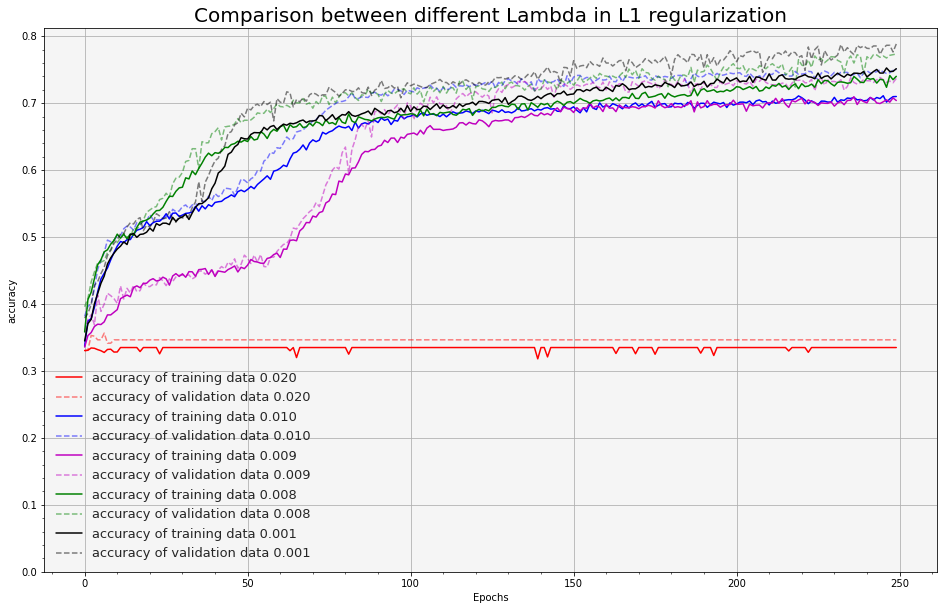

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


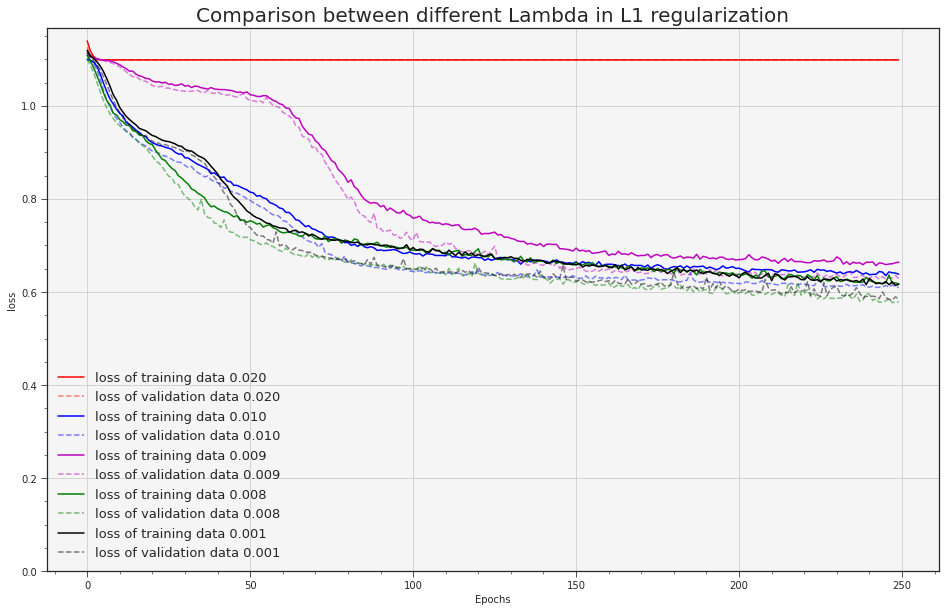

In [ ]:
for obs in ('accuracy', 'loss'):
    plt.figure(figsize = (16,10))
    plt.xticks()
    plt.minorticks_on()
    plt.style.use('seaborn-ticks')
    ax = plt.axes()
    ax.set_facecolor("whitesmoke")
    plt.grid()

    plt.plot(fit4.history[obs], 'r', label = obs +' of training data 0.020')
    plt.plot(fit4.history['val_' + obs], 'r--', label = obs + ' of validation data 0.020', alpha=0.5)


    plt.plot(fit1.history[obs], 'b', label = obs +' of training data 0.010')
    plt.plot(fit1.history['val_' + obs], 'b--', label = obs + ' of validation data 0.010', alpha=0.5)


    plt.plot(fit5.history[obs], 'm', label = obs +' of training data 0.009')
    plt.plot(fit5.history['val_' + obs], 'm--', label = obs + ' of validation data 0.009', alpha=0.5)

    plt.plot(fit3.history[obs], 'g', label = obs +' of training data 0.008')
    plt.plot(fit3.history['val_' + obs], 'g--', label = obs + ' of validation data 0.008', alpha=0.5)
    
    plt.plot(fit.history[obs], 'k', label = obs +' of training data 0.001')
    plt.plot(fit.history['val_' + obs], 'k--', label = obs + ' of validation data 0.001', alpha=0.5)



    plt.title('Comparison between different Lambda in L1 regularization',fontsize=20)
    plt.ylabel(obs)
    plt.xlabel('Epochs')
    plt.ylim(ymin=0)
    plt.legend(fontsize=13,loc='best')
    plt.show()


In this plots we can see that using a $\lambda = 0.020$ the regularization is too strong and the model can't properply converge, meanwhile it seems that $\lambda= 0.010$ is the optimal value (and also it was the one we have used in all the previous CNN), it converges and after $200$ ``epochs``. The others values are also quite good. 

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


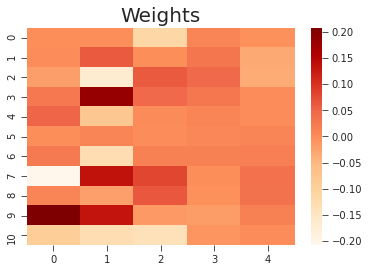

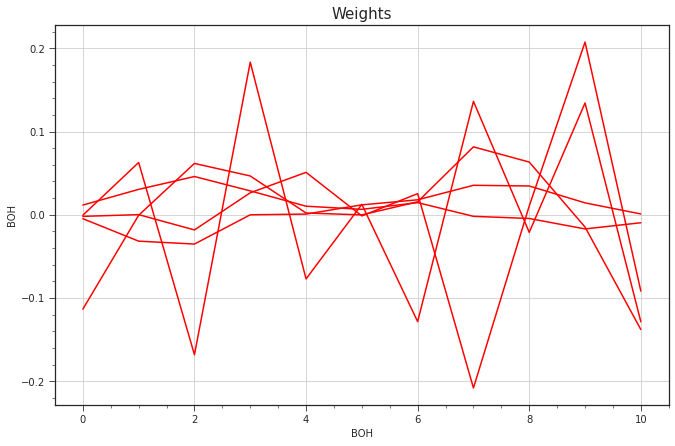

In [ ]:
weights,biases = model.layers[0].get_weights()

ax = seaborn.heatmap(weights[:,0,:], cmap="OrRd")
ax.set_title('Weights', fontsize=20)

plt.figure(figsize = (11,7))
for i in range(weights.shape[2]): 
    ax.set_facecolor("whitesmoke")
    plt.plot(weights[:,0,i], 'r')

plt.style.use('seaborn-ticks')
plt.xticks()
plt.minorticks_on()
ax = plt.axes()
plt.grid()
plt.title("Weights",fontsize=15)
plt.ylabel('BOH')
plt.xlabel('BOH')
plt.show()

Let's see the visualization on the weights of the filters.

The best value of $\lambda$ is $0.010$. We do a comparison of the masks between $\lambda=0.010$ and $\lambda=0.001$. We have also plot $\lambda=0.020$ to understand the meaning of the weights. 

Text(0.5, 1.0, 'Confusion matrix weights 0.010')

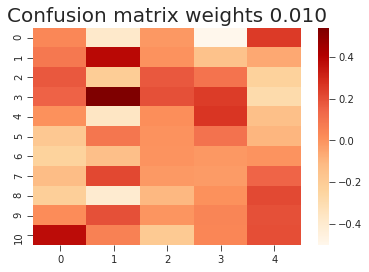

In [ ]:
weights,_ = model.layers[0].get_weights()
weights1,_= model1.layers[0].get_weights()
weights4,_ = model4.layers[0].get_weights()

ax = seaborn.heatmap(weights1[:,0,:], cmap="OrRd")
ax.set_title('Confusion matrix weights 0.010', fontsize=20)

/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


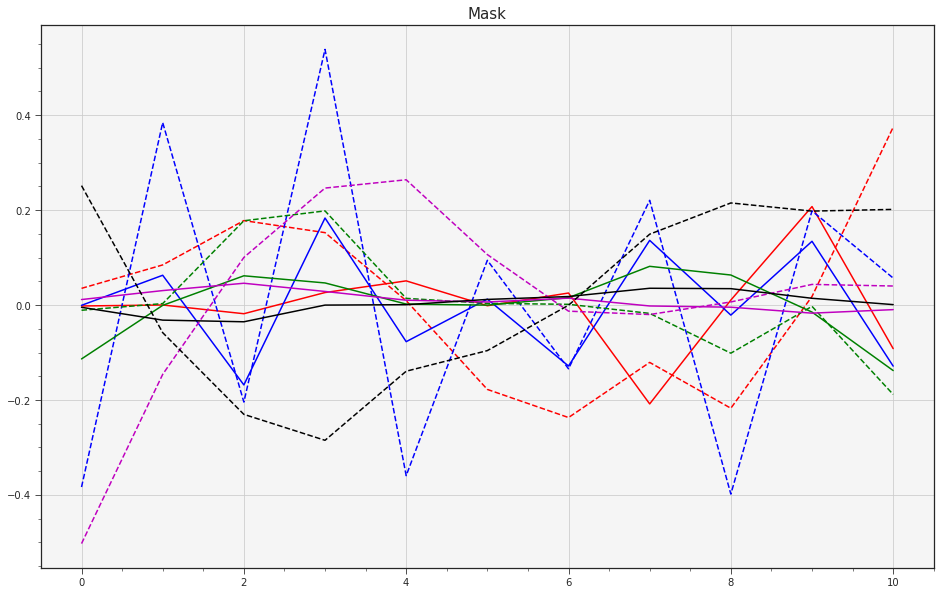

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks()
plt.minorticks_on()
plt.style.use('seaborn-ticks')
ax = plt.axes()
ax.set_facecolor("whitesmoke")

plt.plot(weights[:,0,0],'r')
plt.plot(weights1[:,0,0],'r--')

plt.plot(weights[:,0,1],'b')
plt.plot(weights1[:,0,1],'b--')

plt.plot(weights[:,0,2],'g')
plt.plot(weights1[:,0,2],'g--')

plt.plot(weights[:,0,3],'m')
plt.plot(weights1[:,0,3],'m--')

plt.plot(weights[:,0,4],'k')
plt.plot(weights1[:,0,4],'k--')
plt.style.use('seaborn-ticks')
plt.xticks()
plt.minorticks_on()
ax = plt.axes()
plt.grid()
plt.title("Mask",fontsize=15)
plt.show()


/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/shared-libs/python3.6/py-core/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


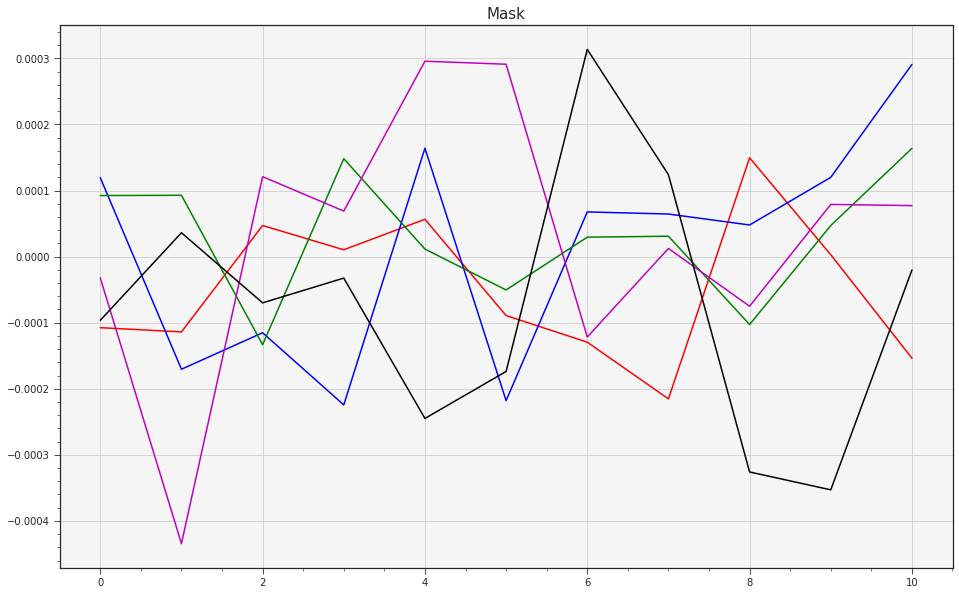

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks()
plt.minorticks_on()
plt.style.use('seaborn-ticks')
ax = plt.axes()
ax.set_facecolor("whitesmoke")

plt.plot(weights4[:,0,0],'r')
# plt.plot(weights1[:,0,0],'r--')

plt.plot(weights4[:,0,1],'b')
# plt.plot(weights1[:,0,1],'b--')

plt.plot(weights4[:,0,2],'g')
# plt.plot(weights1[:,0,2],'g--')

plt.plot(weights4[:,0,3],'m')
# plt.plot(weights1[:,0,3],'m--')

plt.plot(weights4[:,0,4],'k')
# plt.plot(weights1[:,0,4],'k--')
plt.style.use('seaborn-ticks')
plt.xticks()
plt.minorticks_on()
ax = plt.axes()
plt.grid()
plt.title("Mask",fontsize=15)
plt.show()

Looking at the second plot, we have understood that, if the model is bad (the model with $\lambda=0.020$), then all the value of the weights are very small compared to the one of a better model. So bigger weights seems to lead to better predictions.

Then we can understand the first plot, which is a comparison between two good model. The best model is the one with more amplitude of the weights. This is according to the previous plot of the ADAM accuracy/loss function.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fe671672-af6a-4685-87e3-e4b820a4c76e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>